In [1]:
from IPython.core.display import HTML
HTML("""
<style>
div.text_cell_render { /* Customize text cells */
font-family: 'Times New Roman';
font-size:1.3em;
line-height:1.4em;
padding-left:1.5em;
padding-right:1.5em;
}
</style>
""")

### 3.1 The class size paradox

For a probability distribution, the mean calculated from its PMF is lower than the one calculated by taking a sample from it. This happens because the larger classes tend to get oversampled.
<br><br>

<b>Exercise 3.1</b> Build the PMF of the college class-size data and compute the mean as perceived by the Dean. Find the distribution of class sizes as perceived by students and compute
its mean.

<b>Solution:</b> The mean class size perceived by the dean is <b>23.692</b> which is significantly lower than the mean class size perceived by the students, which is <b>30.019</b>.

In [2]:
# Mean Class Size perceived by dean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
class_size_dict = {
    7: 8,
    12: 8,
    17: 14,
    22: 4,
    27: 6,
    32: 12,
    37: 8,
    42: 3,
    47: 2
}
l = []
for key, value in class_size_dict.items():
    for i in range(value):
        l.append(key)
class_sizes = pd.Series(l)
print("Mean Class Size as perceived by the dean is: " + str(class_sizes.mean()))
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
sns.distplot(class_sizes, bins=40, hist=True, kde=False, norm_hist=True)
ax.set_xlabel('Class Size')
ax.set_ylabel('Probability')
ax.set_title('PMF of Class Size (as perceived by Dean)')
plt.show()

Mean Class Size as perceived by the dean is: 23.6923076923


<Figure size 800x600 with 1 Axes>

Mean Class Size perceived by the students is: 28.6233766234


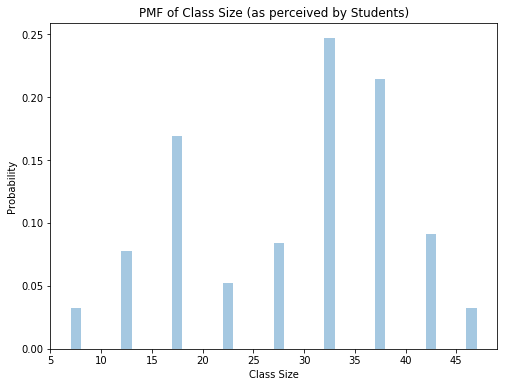

In [3]:
# Mean Class Size perceived by students
l = []
for key, value in class_size_dict.items():
    for i in range(key*value):
        l.append(key)
population = pd.Series(l)
sample = population.sample(frac=0.1, replace=False)
print("Mean Class Size perceived by the students is: " + str(sample.mean()))
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
sns.distplot(sample, bins=40, hist=True, kde=False, norm_hist=True)
ax.set_xlabel('Class Size')
ax.set_ylabel('Probability')
ax.set_title('PMF of Class Size (as perceived by Students)')
plt.show()

### 3.2 The limits of PMFs 

PMFs work well if the number of values is small. But as the number of values increases, the probability associated with each value gets smaller and the effect of random noise increases. The plot of PMFs for birth weight for first babies and others is shown below and it is evident that they are hard to compare. Binning can be used to get a more smooth plot but with a drawback that they can also smooth out useful information.

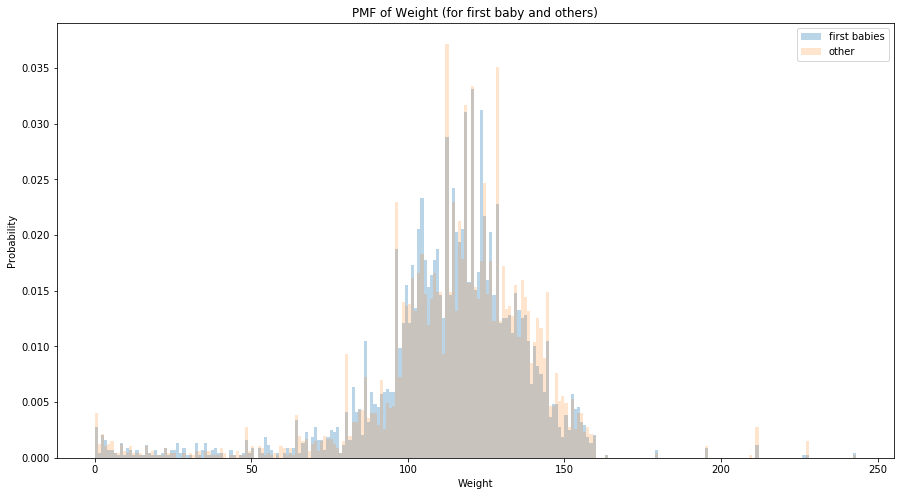

In [4]:
pregnancies = pd.read_fwf("2002FemPreg.dat", 
                         names=["caseid", "nbrnaliv", "babysex", "birthwgt_lb",
                               "birthwgt_oz", "prglength", "outcome", "birthord",
                               "agepreg", "finalwgt"],
                         colspecs=[(0, 12), (21, 22), (55, 56), (57, 58), (58, 60),
                                (274, 276), (276, 277), (278, 279), (283, 285), (422, 439)])

first_child = pregnancies[(pregnancies['outcome'] == 1) & (pregnancies['birthord'] == 1)][['birthwgt_lb', 'birthwgt_oz']].dropna()
other = pregnancies[(pregnancies['outcome'] == 1) & (pregnancies['birthord'] != 1)][['birthwgt_lb', 'birthwgt_oz']].dropna()

first_child = first_child['birthwgt_lb']*16 + first_child['birthwgt_oz']
other = other['birthwgt_lb']*16 + other['birthwgt_oz']

bins =  int(max(first_child.max(), other.max()) - min(first_child.min() , other.min()))
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
sns.distplot(first_child, label='first babies', bins=bins, kde=False, norm_hist=True, hist_kws={"alpha": 0.3})
sns.distplot(other, label='other', bins=bins, kde=False, norm_hist=True, hist_kws={"alpha": 0.2})
ax.set_xlabel('Weight')
ax.set_ylabel('Probability')
ax.set_title('PMF of Weight (for first baby and others)')
plt.legend()
plt.show()

### 3.4 Cumulative distribution functions

The <b>Cumulative Distribution Function (CDF)</b> is the function that maps values to their percentile rank in a distribution. The CDF of the birth weight is shown below and it can be perceived that first babies tend to have lower birth weight.

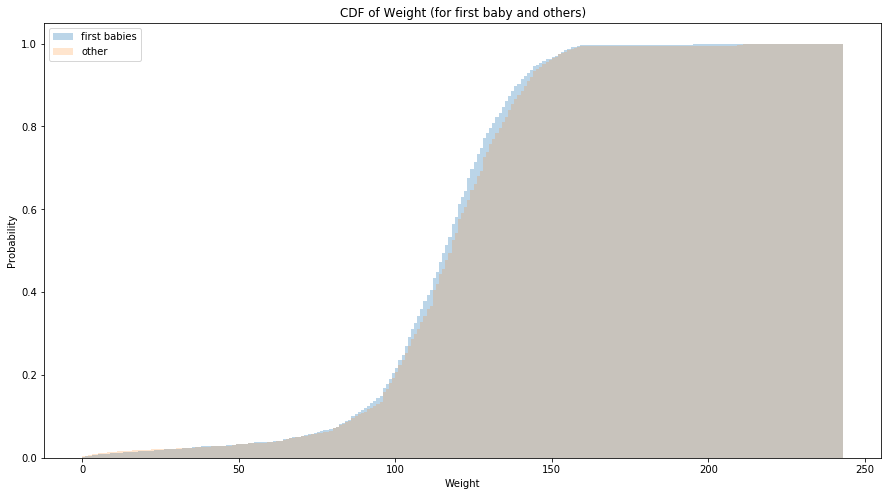

In [5]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
sns.distplot(first_child, label='first babies', bins=bins, kde=False, norm_hist=True, hist_kws={"alpha": 0.3, 'cumulative': True})
sns.distplot(other, label='other', bins=bins, kde=False, norm_hist=True, hist_kws={"alpha": 0.2, 'cumulative': True})
ax.set_xlabel('Weight')
ax.set_ylabel('Probability')
ax.set_title('CDF of Weight (for first baby and others)')
plt.legend()
plt.show()

### 3.7 Conditional Distributions

A <b>conditional distribution</b> is the distribution of a subset of the data which is selected according to a condition. 

### 3.8 Random numbers

CDF can be used to generate random numbers from a given distribution. For this, we can choose a random probability in the range 0-1 and can find the value in the CDF that corresponds to the chosen probability.
<br><br>
<b>Exercise 3.9</b> Using the distribution of birth weights from the NSFG, generate a random sample with 1000 elements. Compute the CDF of the sample. Make a plot that shows the original CDF and the CDF of the random sample. For large values of n, the distributions should be the same.

/Users/amitrajan/Desktop/PythonVirtualEnv/Python3_VirtualEnv/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `itemfreq` is deprecated!
`itemfreq` is deprecated and will be removed in a future version. Use instead `np.unique(..., return_counts=True)`
  if __name__ == '__main__':
/Users/amitrajan/Desktop/PythonVirtualEnv/Python3_VirtualEnv/lib/python3.6/site-packages/matplotlib/legend.py:641: UserWarning: Unrecognized location "left". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


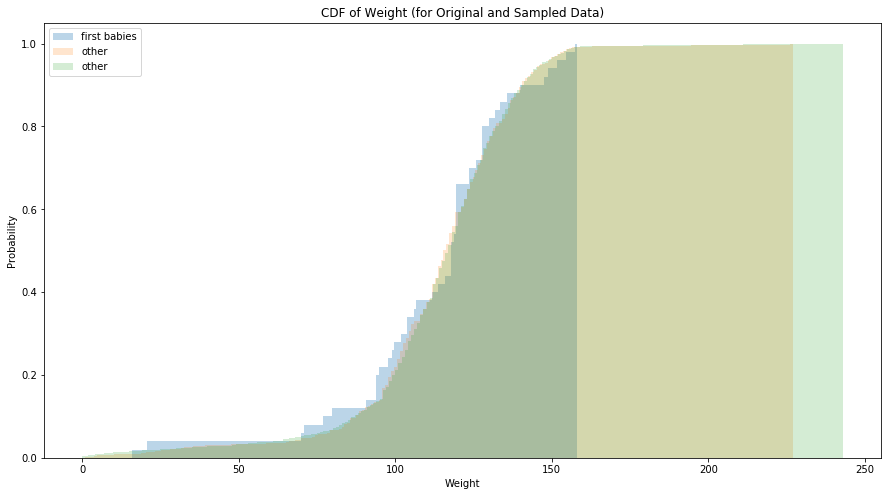

In [7]:
from scipy import stats
import numpy as np
weights = pregnancies[pregnancies['outcome'] == 1][['birthwgt_lb', 'birthwgt_oz']].dropna()
weights = weights['birthwgt_lb']*16 + weights['birthwgt_oz']
weights = weights.astype(int)

# Generate CDF and 1000 RVs
W = np.asarray(weights)
S = stats.itemfreq(W)
N = len(W)
xk = []
pk = []
for i in range(0, S.shape[0]):
    xk.append(S[i, 0])
    pk.append(S[i, 1]/N)
cdf_weights = stats.rv_discrete(name='cdf_weights', values=(xk, pk))
l_50 = cdf_weights.rvs(size=50)
l_1000 = cdf_weights.rvs(size=1000)

# Plot CDF of Sample
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
ax.hist(l_50, 1000, normed=1, histtype='step', cumulative=True, label='50 Samples')
ax.hist(l_1000, 1000, normed=1, histtype='step', cumulative=True, label='1000 Samples')
ax.hist(weights, 1000, normed=1, histtype='step', cumulative=True, label='Original Data')
sns.distplot(l_50, label='50 samples', bins=bins, kde=False, norm_hist=True, hist_kws={"alpha": 0.3, 'cumulative': True})
sns.distplot(l_1000, label='1000 Samples', bins=bins, kde=False, norm_hist=True, hist_kws={"alpha": 0.2, 'cumulative': True})
sns.distplot(weights, label='other', bins=bins, kde=False, norm_hist=True, hist_kws={"alpha": 0.2, 'cumulative': True})
ax.set_xlabel('Weight')
ax.set_ylabel('Probability')
ax.set_title('CDF of Weight (for Original and Sampled Data)')
ax.legend(loc='left')
plt.show()
